<a href="https://colab.research.google.com/github/neerajkumarkannoujiya/IIITA-Assesment/blob/main/MSD2024017_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-5-b1fe1af2b49c>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  basket_matrix = data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
<ipython-input-5-b1fe1af2b49c>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_matrix = basket_matrix.applymap(lambda x: 1 if x > 0 else 0).astype(bool)  # Convert quantities to binary values

      support                                           itemsets
0    0.010358                 ( SET 2 TEA TOWELS I LOVE LONDON )
1    0.013056                           (10 COLOUR SPACEBOY PEN)
2    0.010088                  (12 MESSAGE CARDS WITH ENVELOPES)
3    0.014890                    (12 PENCIL SMALL TUBE WOODLAND)
4    0.016562              (12 PENCILS SMALL TUBE RED RETROSPOT)
..        ...                                                ...
968  0.011977  (LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
969  0.014297  (ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...
970  0.010035  (POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...
971  0.012894  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...
972  0.010412  (LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE,...

[973 rows x 2 columns]
                                           antecedents  \
0                    (60 CAKE CASES DOLLY GIRL DESIGN)   
1                    (60 CAKE CASES VINTAGE CHRISTMAS)   
2                (SET 

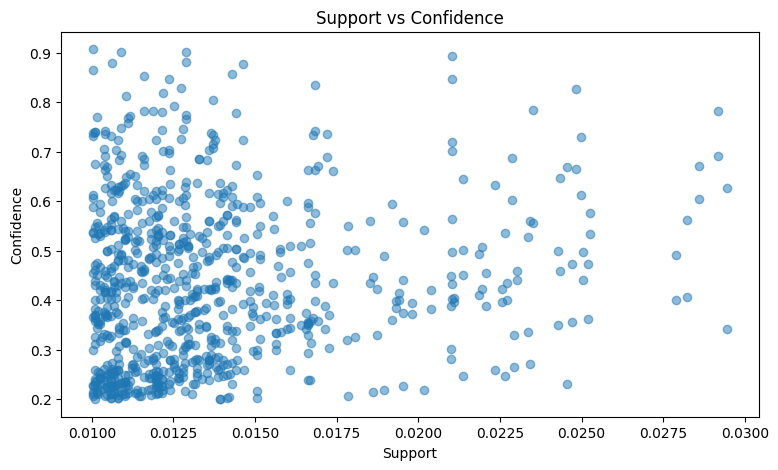

                                           antecedents  \
476                           (REGENCY TEA PLATE PINK)   
475                         (REGENCY TEA PLATE GREEN )   
801  (POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...   
802                    (POPPY'S PLAYHOUSE LIVINGROOM )   
469                           (REGENCY MILK JUG PINK )   
470                         (REGENCY SUGAR BOWL GREEN)   
804                       (POPPY'S PLAYHOUSE BEDROOM )   
799  (POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...   
479                         (REGENCY TEA PLATE ROSES )   
480                           (REGENCY TEA PLATE PINK)   

                                           consequents  antecedent support  \
476                         (REGENCY TEA PLATE GREEN )            0.012085   
475                           (REGENCY TEA PLATE PINK)            0.014566   
801                    (POPPY'S PLAYHOUSE LIVINGROOM )            0.013703   
802  (POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUS

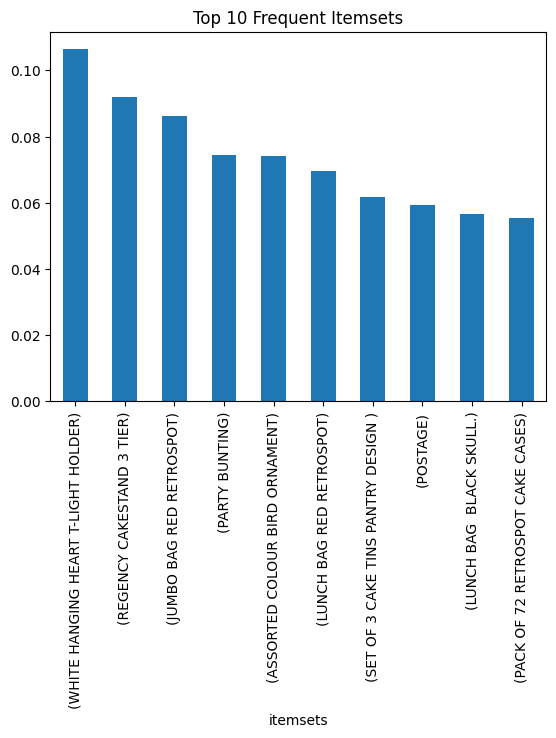

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Load data from Excel
C_use = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'CustomerID']
data = pd.read_excel('retail.xlsx', usecols=C_use, dtype={'InvoiceNo': str, 'StockCode': str})

# Data preprocessing
data = data[data['Quantity'] > 0].dropna(subset=['CustomerID'])
data['Description'] = data['Description'].astype('category')  # Convert 'Description' to categorical type

# Create a basket matrix
basket_matrix = data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket_matrix = basket_matrix.applymap(lambda x: 1 if x > 0 else 0).astype(bool)  # Convert quantities to binary values

# Apply the Apriori algorithm to find frequent itemsets
minimum_support = 0.01  # Set a lower minimum support to capture more itemsets
frequent_itemsets_df = apriori(basket_matrix, min_support=minimum_support, use_colnames=True)
print(frequent_itemsets_df)

# Generate association rules from the frequent itemsets
minimum_confidence = 0.2  # Set a lower minimum confidence to find more rules
association_rules_df = association_rules(frequent_itemsets_df, metric="confidence", min_threshold=minimum_confidence)
print(association_rules_df)

# Visualize the relationship between support and confidence
plt.figure(figsize=(9, 5))
plt.scatter(association_rules_df['support'], association_rules_df['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

# Display the top 10 rules sorted by lift
top_10_rules_df = association_rules_df.sort_values(by='lift', ascending=False).head(10)
print(top_10_rules_df)

# Visualize the top 10 frequent itemsets by their support
frequent_itemsets_df.sort_values(by='support', ascending=False).head(10).plot(
    kind='bar', x='itemsets', y='support', legend=False, title='Top 10 Frequent Itemsets'
)
plt.show()
